<a href="https://colab.research.google.com/github/adaan22/hackthebias2026/blob/main/hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import torch
from torch import nn
from google.colab import files
import pandas as pd
import os


In [40]:
import kagglehub
path = kagglehub.dataset_download("lorenzozoppelletto/financial-risk-for-loan-approval")

# 2. Automatically find the CSV file in that folder
files = [f for f in os.listdir(path) if f.endswith('.csv')]
csv_path = os.path.join(path, files[0])

# 3. Load and clean immediately
df = pd.read_csv(csv_path)

# 4. The "Magic Fix" for the hidden spaces we talked about
df.columns = df.columns.str.strip()
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# 5. Show the result (remember the parentheses!)
df.head()

Using Colab cache for faster access to the 'financial-risk-for-loan-approval' dataset.


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [41]:
df.drop('ApplicationDate', axis=1, inplace=True)
df.drop('LoanApproved', axis=1, inplace=True)
df.drop('LoanPurpose', axis=1, inplace=True)

df.head()

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,45,39948,617,Employed,Master,22,13152,48,Married,2,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,49.0
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,52.0
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,52.0
3,58,69084,545,Employed,High School,34,37898,96,Single,1,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,54.0
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,36.0


In [42]:
df['EmploymentStatus'] = df['EmploymentStatus'].replace({'Unemployed':0, 'Employed':1, 'Self-Employed': 2})
df['EducationLevel'] = df['EducationLevel'].replace({'High School':0, 'Associate':1, 'Bachelor': 2, 'Master' :3, 'Doctorate' : 4})
df['MaritalStatus'] = df['MaritalStatus'].replace({'Single':0, 'Married':1, 'Divorced': 2, 'Widowed': 3})
df['HomeOwnershipStatus'] = df['HomeOwnershipStatus'].replace({'Other':0, 'Rent':1, 'Mortgage': 2, 'Own': 3})
df.head()


/tmp/ipython-input-1206067435.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['EmploymentStatus'] = df['EmploymentStatus'].replace({'Unemployed':0, 'Employed':1, 'Self-Employed': 2})
/tmp/ipython-input-1206067435.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['EducationLevel'] = df['EducationLevel'].replace({'High School':0, 'Associate':1, 'Bachelor': 2, 'Master' :3, 'Doctorate' : 4})
/tmp/ipython-input-1206067435.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future ve

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,45,39948,617,1,3,22,13152,48,1,2,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,49.0
1,38,39709,628,1,1,15,26045,48,0,1,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,52.0
2,47,40724,570,1,2,26,17627,36,1,2,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,52.0
3,58,69084,545,1,0,34,37898,96,0,1,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,54.0
4,37,103264,594,1,1,17,9184,36,1,1,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,36.0


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(['RiskScore'], axis=1)

y = df['RiskScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()

# 4. Fit ONLY on training data, but transform BOTH
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
# Convert X to float32 (standard for NN weights)
X_train_t = torch.tensor(X_train.values, dtype=torch.float32)
X_test_t = torch.tensor(X_test.values, dtype=torch.float32)

# Convert y and use .view(-1, 1) to make it a column vector
y_train_t = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_t = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

print(f"Final X shape: {X_train_t.shape}") # Should be [16000, 32]
print(f"Final y shape: {y_train_t.shape}")

Final X shape: torch.Size([16000, 32])
Final y shape: torch.Size([16000, 1])


In [44]:
import torch.nn  as nn
class RiskPredictor(nn.Module):
    def __init__(self, input_dim):
        super(RiskPredictor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

In [45]:
model = RiskPredictor(32)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [46]:
epochs = 1000
for epoch in range(epochs):
    model.train()

    # 1. Forward Pass
    outputs = model(X_train_t)
    loss = loss_fn(outputs, y_train_t)

    # 2. Backward Pass (The "Learning")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/1000], Loss: 2020.5850
Epoch [20/1000], Loss: 250.8915
Epoch [30/1000], Loss: 167.9188
Epoch [40/1000], Loss: 139.9689
Epoch [50/1000], Loss: 68.6687
Epoch [60/1000], Loss: 50.0998
Epoch [70/1000], Loss: 41.7435
Epoch [80/1000], Loss: 37.2982
Epoch [90/1000], Loss: 33.5126
Epoch [100/1000], Loss: 30.5379
Epoch [110/1000], Loss: 28.0683
Epoch [120/1000], Loss: 26.0147
Epoch [130/1000], Loss: 24.2673
Epoch [140/1000], Loss: 22.7636
Epoch [150/1000], Loss: 21.4516
Epoch [160/1000], Loss: 20.2883
Epoch [170/1000], Loss: 19.2477
Epoch [180/1000], Loss: 18.3158
Epoch [190/1000], Loss: 17.4772
Epoch [200/1000], Loss: 16.7178
Epoch [210/1000], Loss: 16.0244
Epoch [220/1000], Loss: 15.3957
Epoch [230/1000], Loss: 14.8231
Epoch [240/1000], Loss: 14.3004
Epoch [250/1000], Loss: 13.8200
Epoch [260/1000], Loss: 13.3799
Epoch [270/1000], Loss: 12.9779
Epoch [280/1000], Loss: 12.6100
Epoch [290/1000], Loss: 12.2710
Epoch [300/1000], Loss: 11.9606
Epoch [310/1000], Loss: 11.6763
Epoch [320/1

In [47]:
model.eval()
import numpy as np

# 2. Run the Test Set through the model
with torch.no_grad():
    test_predictions = model(X_test_t)
    test_loss = loss_fn(test_predictions, y_test_t)

print(f"Final Test Loss (MSE): {test_loss.item():.4f}")
print(f"Average Points Off (RMSE): {np.sqrt(test_loss.item()):.4f}")

# 3. Create a clean comparison table for the judges
comparison = pd.DataFrame({
    'Actual Risk': y_test_t.numpy().flatten(),
    'Predicted Risk': test_predictions.numpy().flatten()
})

print("\n--- First 10 Test Set Results ---")
print(comparison.head(10))

Final Test Loss (MSE): 9.4132
Average Points Off (RMSE): 3.0681

--- First 10 Test Set Results ---
   Actual Risk  Predicted Risk
0    41.599998       45.100372
1    38.400002       38.090141
2    53.000000       54.039703
3    50.000000       51.720390
4    51.000000       50.220184
5    47.000000       45.362228
6    52.000000       52.045212
7    46.000000       41.128426
8    69.000000       68.628723
9    55.000000       54.394299


In [48]:
# 1. Attach the predictions to our test dataframe
X_test_analysis = X_test.copy()
X_test_analysis['Actual_Risk'] = y_test.values
X_test_analysis['Predicted_Risk'] = test_predictions.numpy().flatten()

# 2. Calculate the "Bias Gap" (The Error)
X_test_analysis['Error'] = X_test_analysis['Predicted_Risk'] - X_test_analysis['Actual_Risk']

# 3. Compare Marital Status (0 = Single, 1 = Married)
bias_report = X_test_analysis.groupby('MaritalStatus')['Error'].agg(['mean', 'std'])

print("--- HACK THE BIAS REPORT ---")
print(bias_report)

# 4. Interpret the result
single_error = bias_report.loc[0, 'mean']
married_error = bias_report.loc[1, 'mean']
gap = abs(single_error - married_error)

print(f"\nBias Gap: {gap:.4f}")
if gap > 0.5:
    print("RESULT: Systemic Bias Detected. The model treats Marital Status differently.")
else:
    print("RESULT: Model is Fair. Marital Status does not skew the predictions.")

--- HACK THE BIAS REPORT ---
                   mean       std
MaritalStatus                    
-1.173024      0.024490  3.021767
 0.070327      0.055960  3.076520
 1.313678      0.024738  3.098651
 2.557029      0.470270  3.187761


KeyError: 0

In [49]:
# Calculate correlation between Age and Error
age_correlation = X_test_analysis['Age'].corr(X_test_analysis['Error'])

print(f"Correlation between Age and Prediction Error: {age_correlation:.4f}")

if abs(age_correlation) > 0.1:
    print("RESULT: Age Bias detected. The model's accuracy shifts based on the applicant's age.")
else:
    print("RESULT: Age Neutral. The model is equally accurate across different age groups.")

Correlation between Age and Prediction Error: 0.0006
RESULT: Age Neutral. The model is equally accurate across different age groups.


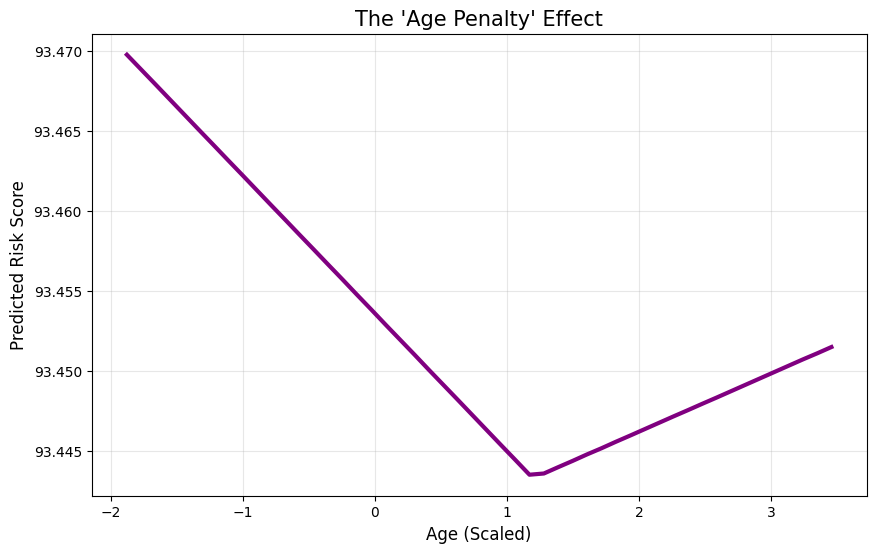

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_age_impact():
    model.eval()

    # 1. Start with a "Average" person (using the mean of your data)
    person_template = X_train.mean().to_frame().T

    # 2. Pick a range of ages to test (from the minimum to maximum age in your data)
    age_range = np.linspace(X_train['Age'].min(), X_train['Age'].max(), 50)
    predicted_risks = []

    for age in age_range:
        # Update the age for this person
        temp_person = person_template.copy()
        temp_person['Age'] = age

        # Scale and Predict
        scaled_input = scaler.transform(temp_person)
        tensor_input = torch.tensor(scaled_input, dtype=torch.float32)

        with torch.no_grad():
            risk = model(tensor_input).item()
            predicted_risks.append(risk)

    # 3. Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(age_range, predicted_risks, color='purple', linewidth=3)
    plt.title("The 'Age Penalty' Effect", fontsize=15)
    plt.xlabel("Age (Scaled)", fontsize=12)
    plt.ylabel("Predicted Risk Score", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

simulate_age_impact()

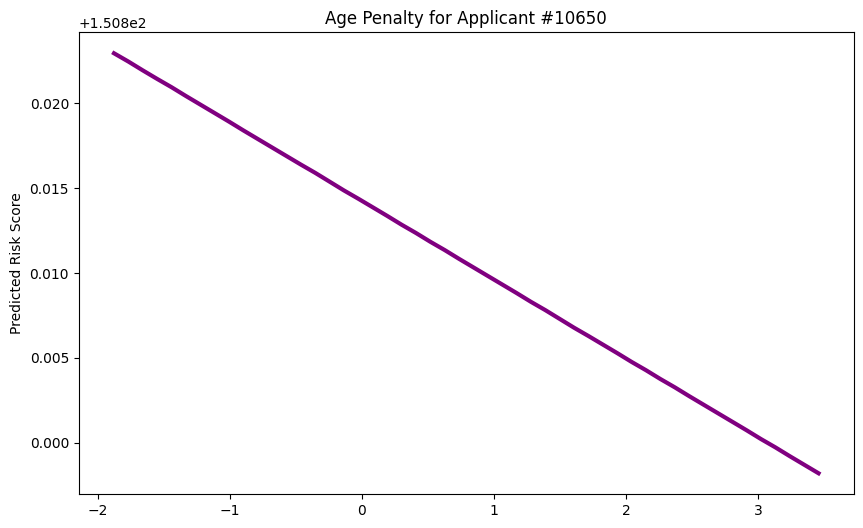

In [51]:
def simulate_real_age_impact():
    model.eval()

    # 1. Grab an actual person from the test set (e.g., the first row)
    person_template = X_test.iloc[0:1].copy()

    age_range = np.linspace(X_train['Age'].min(), X_train['Age'].max(), 50)
    predicted_risks = []

    for age in age_range:
        temp_person = person_template.copy()
        temp_person['Age'] = age

        scaled_input = scaler.transform(temp_person)
        with torch.no_grad():
            risk = model(torch.tensor(scaled_input, dtype=torch.float32)).item()
            predicted_risks.append(risk)

    plt.figure(figsize=(10, 6))
    plt.plot(age_range, predicted_risks, color='purple', linewidth=3)
    plt.title(f"Age Penalty for Applicant #{person_template.index[0]}")
    plt.ylabel("Predicted Risk Score")
    plt.show()

simulate_real_age_impact()

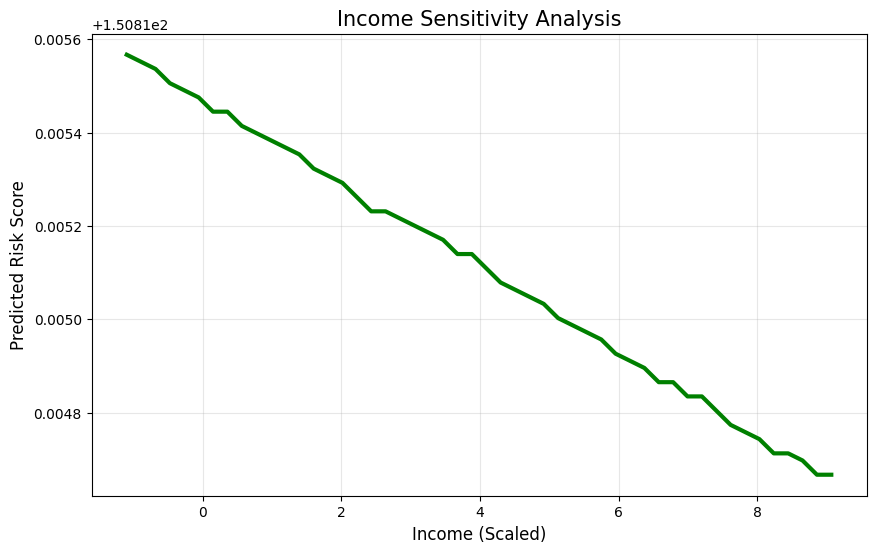

In [52]:
def simulate_income_impact():
    model.eval()
    # 1. Grab a real applicant as a baseline
    person_template = X_test.iloc[0:1].copy()

    # 2. Define a range of incomes (from the min to max in your dataset)
    income_range = np.linspace(X_train['AnnualIncome'].min(), X_train['AnnualIncome'].max(), 50)
    predicted_risks = []

    for inc in income_range:
        temp_person = person_template.copy()
        temp_person['AnnualIncome'] = inc

        # Scale and Predict
        scaled_input = scaler.transform(temp_person)
        with torch.no_grad():
            risk = model(torch.tensor(scaled_input, dtype=torch.float32)).item()
            predicted_risks.append(risk)

    # 3. Plot it
    plt.figure(figsize=(10, 6))
    plt.plot(income_range, predicted_risks, color='green', linewidth=3)
    plt.title("Income Sensitivity Analysis", fontsize=15)
    plt.xlabel("Income (Scaled)", fontsize=12)
    plt.ylabel("Predicted Risk Score", fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.show()

simulate_income_impact()